In [1]:
##차원 축소의 또 다른 방식 => 특성 추출

##데이터셋의 정보를 요약하는 세 가지 기술
    #1. 주성분 분석을 이용한 비지도 데이터 압축하기
    #2. 선형 판별 분석을 이용하여 클래스 구별 능력 최대화 하기
    #3. 커널 PCA를 사용한 비선형 차원 축소하기

In [2]:
####주성분 분석(Principle Component Analysis, PCA)####
##특성 추출은 새로운 공간으로 데이터를 변형하거나 투영한다. (특성 선택은 원본 특성을 유지)
    #저장 공간 절약, 학습 알고리즘의 계산 효율성 향상, 차원의 저주 문제 감소를 통한 예측 성능 향상

In [3]:
#####PCA####
##특성 사이의 상관 관계를 기반으로 데이터의 특성을 잡아낼 수 있다.
##PCA를 사용할 단계
#1. d차원 데이터셋을 표준화한다
#2. 공분산 행렬을 만든다
#3. 공분산 행렬을 고유 벡터와 고유값으로 분해한다
#4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매긴다
#5. 고윳값이 가장 큰 k(새로운 특성 부분 공간의 차원)개의 고유 벡터를 선택한다.
#6. 최상위 k개의 고유 벡터로 투영 행렬 W를 만든다
#7. 투영 행렬 W를 사용해 d 차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환한다. 

In [4]:
##주성분 추출 단계
#위의 단계 중 1~4번 수행

#wine 데이터 셋 로드
import pandas as pd
df_wine = pd.read_csv(r'E:\Programming\python\ML\data\wine.data', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#70% 훈련 30%테스트
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

#특성을 표준화 전처리한다. (1번단계)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [6]:
##공분산 행렬 구성하기
#d x d 차원의 대칭 행렬로 특성 상호 간의 공분산을 저장
#d는 데이터셋에 있는 차원 개수
#wine 데이터셋의 차원은 13이므로 공분산 행렬은 13 x 13이된다.

In [7]:
##공분산 행렬의 고유 벡터와 고유값의 쌍 구하기
#numpy의 linalg.eig 함수 사용
import numpy as np

cov_mat = np.cov(X_train_std.T) #표준화 전처리된 훈련 데이터셋의 공분산 행렬을 계산
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) #고윳값 분해 수행 => eigen_vals는 벡터, eigen_vecs는 행렬
print('\n고유값 \n%s' %eigen_vals)


고유값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


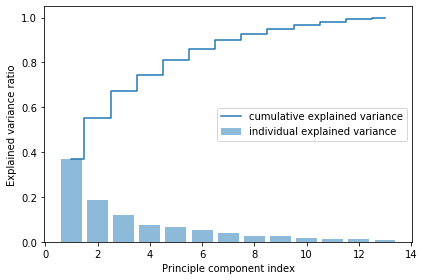

In [8]:
#데이터셋 차원을 새로운 특성 부분 공간으로 압축해서 줄여야 하기 떄문에 가장 많은 정보(분산)을 가진 고유 벡터 일부만 선택(최상위 k개의 고유 벡터 선택)
#고유값의 설명된 분산 비율 그래프 그리기
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principle component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [9]:
##남은 3 단계 진행하기

In [10]:
#투영 행렬 W 구성하기

#(고유값, 고유 벡터) 튜플 리스트 만들기
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

#높은 값에서 낮은 값으로 튜플쌍을 정렬한다
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [11]:
#가장 큰 두개의 고윳값에 해당하는 고유 벡터를 선택
#주성분의 개수는 계산 효율성과 모뎅 성능 사이의 절충점을 찾아서 결정해야함
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬:\n', w) #13 x 2차원의 투영 행렬 W 생성

투영 행렬:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [12]:
#샘플을 PCA부분 공간으 투영하여 두 개의 특성으로 구성된 2차원 샘플 벡터 얻기

X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [13]:
#전체(124 x 13) 차원의 훈련 데이터셋을 행렬 점곱으로 두 개으 주성분으로 변환 가능

X_train_pca = X_train_std.dot(w)

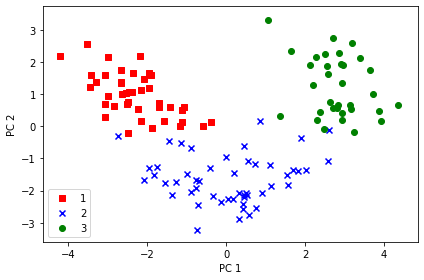

In [14]:
#2차 산점도로 시각화 하기
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show() #y축보다 x축을 따라 더 넓게 분포(선형분류기가 처리하기 용이)

In [15]:
####사이킷런에 구현된 PCA 사용하기####

In [16]:
#PCA를 사용해서 wine 데이터셋의 훈련 세트를 적용하고 로지스틱 회귀로 변환된 샘플 데이터 분류하기
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    #마커와 컬러맵 준비
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #클래스 샘플을 표시합니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap.colors[idx],
                    edgecolors='black',
                    marker=markers[idx],
                    label=cl)

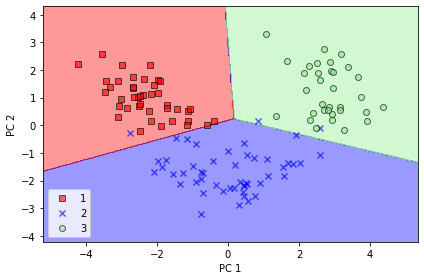

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

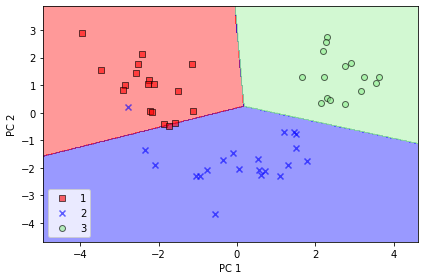

In [18]:
#테스트 세트를 변환 후 로지스틱 회귀가 클래스를 잘 구분하는지 결정 경계 그리기
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [19]:
##전체 주성분의 설명된 분산 비율 알기
pca = PCA(n_components=None) #분산 크기 순서대로 모든 주성분이 반환됨
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [20]:
####선형 판별 분석(Linear Discrimeinant Analyis, LDA)####

In [21]:
#규제가 없는 모델에서 차원의 저주로 인한 고대 적합 정도를 줄이고 계산 효율성 높이기 위한 특성 추출 기법

In [22]:
#LDA의 주요 단계
#1. d(특성 개수) 차원의 데이터셋을 표준화 전처리한다.
#2. 각 클래스에 대해 d 차원의 평균 벡터를 계산한다.
#3. 클래스 간의 산포 행렬(Sb)와 클래스 내 산포 행렬(Sw)를 구성
#4. Sw-1Sb 행렬의 고유 벡터와 고유값을 계산 한다.
#5. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순서를 매긴다
#6. 고윳값이 가장 큰 k개의 고유 벡터를 선택해서 d x k 차원의 변환 행렬 W를 구성(W의 열이 고유 벡터)
#7. 변환 행렬 W를 사용하여 샘플을 새로운 특성 부분 공간으로 투영

In [23]:
#산포 행렬 계산
#1 단계는 PCA의 1단계와 동일.
#2 단계 - 평균 벡터 계산
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(
                     X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label -1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [24]:
#산포 행렬 더하기
d = 13 #특성의 개수
S_W = np.zeros((d, d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scater = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scater += (row - mv).dot((row - mv).T)
    S_W += class_scater
print('클래스 내의 산포 행렬: %sx%s' % (S_W.shape[0], S_W.shape[1]))

클래스 내의 산포 행렬: 13x13


In [25]:
#산포 행렬 계산시 훈련 세트의 클래스 레이블이 균등하게 분포 되있다고 가정하지만 아래의 값을 보면 틀렸다는 것을 알 수 있다.
print('클래스 레이블 분포: %s' % np.bincount(y_train)[1:])

클래스 레이블 분포: [41 50 33]


In [26]:
#개별 산포 행렬을 산포 행렬로 더하기 전에 스케일 조정 필요
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scater = np.cov(X_train_std[y_train == label].T, bias=True)
    S_W += class_scater
print('스케일 조정된 클래스 내의 산포 행렬: %sx%s' % (S_W.shape[0], S_W.shape[1]))

스케일 조정된 클래스 내의 산포 행렬: 13x13


In [27]:
#3. 클래스 간의 산포 행렬 구하기
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1) #열 벡터로 만들기
d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) #열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot(
                (mean_vec - mean_overall).T)
print('클래스 간의 산포 행렬: %sx%s' % (S_B.shape[0], S_B.shape[1]))

클래스 간의 산포 행렬: 13x13


In [28]:
#4 단계
eigen_vals, eigen_vecs =\
           np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [29]:
#5 단계 내림차순 정렬
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,
                     key=lambda k: k[0], reverse=True)
print('내림차순 고윳값:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순 고윳값:

358.00420701336594
177.07768640666222
4.021051265375883e-14
2.842170943040401e-14
2.4310866513628116e-14
2.4310866513628116e-14
1.7592380953431885e-14
1.4781200190724545e-14
1.4781200190724545e-14
6.083378287897576e-15
5.0182074716589354e-15
5.0182074716589354e-15
3.212697679208256e-15


In [30]:
#선형 판별 벡터는 최대 c(클래스 레이블의 개수) - 1 개이다.

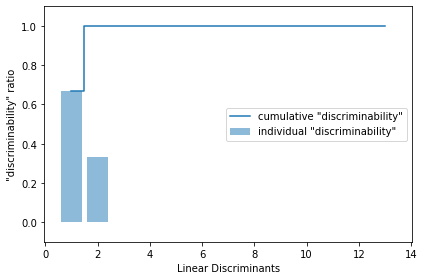

<Figure size 432x288 with 0 Axes>

In [31]:
#선형 판별 벡터 그리기
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np. cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()
#처음 두개의 선형 판별 벡터가 거의 100% 잡아낸다

In [32]:
#변환 행렬 W 만들기
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
print('행렬 W:\n', w)

행렬 W:
 [[-0.1484 -0.4093]
 [ 0.091  -0.1583]
 [-0.0168 -0.3536]
 [ 0.1487  0.322 ]
 [-0.0165 -0.0813]
 [ 0.1912  0.0841]
 [-0.7333  0.2828]
 [-0.0751 -0.0099]
 [ 0.002   0.0902]
 [ 0.2953 -0.2168]
 [-0.0327  0.274 ]
 [-0.3539 -0.0133]
 [-0.3918 -0.5954]]


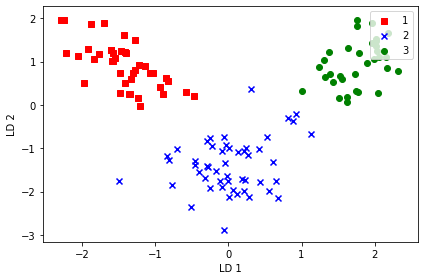

In [33]:
#W를 훈련 세트에 곱해 데이터를 변환
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1] * (-1),
                c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [34]:
####사이킷런의 LDA####

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

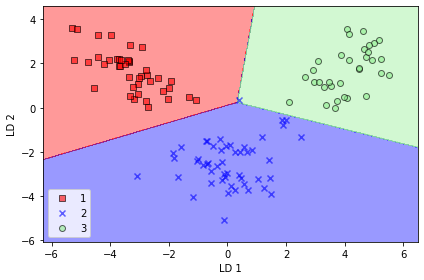

In [36]:
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
#샘플 하나 분류 실패

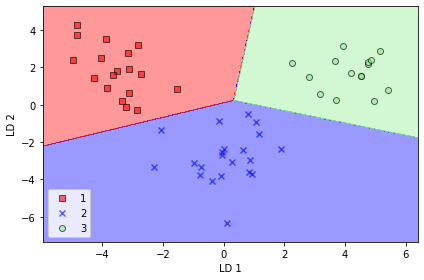

In [37]:
#규제 강도를 낮추어 정화하게 분류하게끔 하기
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [38]:
####커널 PCA를 사용하여 비선형 매핑####

In [39]:
#다수의 알고리즘은 입력 데이터가 선형적으로 구분 가능하다고 가정, 분류되지 못한 데이터는 잡음 처리

In [40]:
#커널 SVM의 비선형 문제 해결 방식처럼 커널 PCA를 통해 비선형 매핑으로 수행해서 데이터를 고차원 공간으로 변환한 후 그 공간에서
#표준 PCA를 적용해서 샘플이 선형 분류기로 구분될 수 있는 저차원 공간으로 데이터를 투영하는 방식은 계산 비용이 너무 비싸다는 단점을 지님
##이때 커널 트릭을 사용##
#원본 특성 공간에서 두 고차원 특성 벡터의 유사도 계산 가능
#즉, 표준 PCA처럼 투영 행렬을 구성한 것이 아닌 각각의 성분이 이미 투영된 샘플인 것이다.

In [41]:
#가장 널리 사용되는 3 가지 커널
#1. 다항 커널, 2. 하이퍼볼릭 탄젠트 커널, 3. 방사 기저 함수(RBF, 가우시안 커널)

In [42]:
#RBF 커널 PCA를 구성하기 위한 3 단계
#1. 샘플의 모든 쌍에 대한 커널 유사도 행렬 계산
#2. 커널 행렬 K를 중앙에 맞추기
#3. 최상위 k개의 고유 벡터 고르기

In [43]:
##커널 PCA 구현하기
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF 커널 PCA 구현

    매개변수
    ------------
    X: {넘파이 ndarray}, shape = [n_samples, n_features]

    gamma: float
      RBF 커널 튜닝 매개변수

    n_components: int
      반환할 주성분 개수
    
    반환값
    -----------
    X_pc: {넘파이 ndarray}, shape = [n_samples, k_features]
      투영된 데이터셋

    """
    
    #MxN 차원의 데이터셋에서 샘플 간의 유클라디안 거리의 제곱을 계산
    sq_dists = pdist(X, 'sqeuclidean')

    #샘플간의 거리를 정방 대칭 행렬로 변환
    mat_sq_dists = squareform(sq_dists)

    #커널 행렬을 계산
    K = exp(-gamma * mat_sq_dists)

    #커널 행렬을 중앙에 맞추기
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    #중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터 구하기
    #scipy.linalg.eigh 함수는 오름 차순으로 반환
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    #최상위 k개의 고유 벡터를 선택(투영 결과)
    X_pc = np.column_stack([eigvecs[:, i]
                            for i in range(n_components)])

    return X_pc

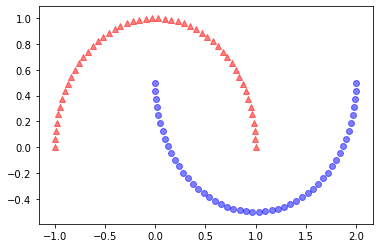

In [44]:
##반달모양 데이터셋 구성
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

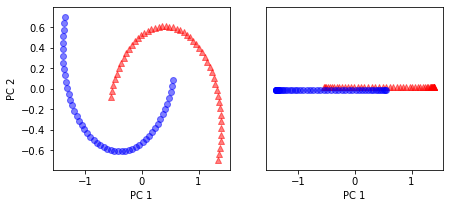

In [45]:
##기본 PCA에 투영하기
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show() #분류하기 힘듬

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


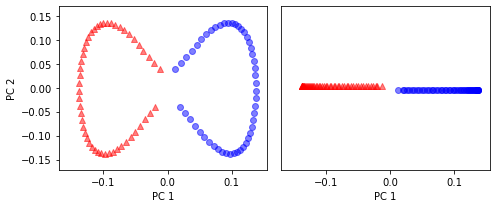

In [46]:
##rbf_kernal_pca 적용
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.tight_layout()
plt.show()

In [47]:
#선형적으로 구분 가능하게됨
#여러 데이터셋에 맞는 gamma값은 없다. 적합한 gamma를 찾기위한 실험 필요

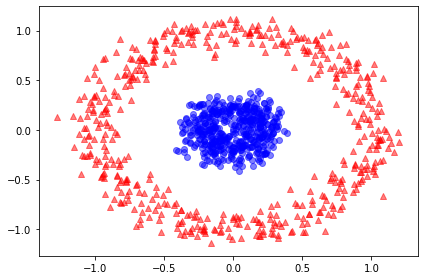

In [48]:
##동심원 분리하기
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

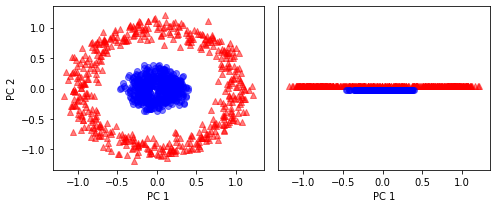

In [49]:
#기본 PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.tight_layout()
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


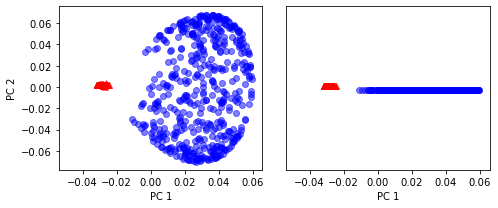

In [50]:
##rbf 커널 PCA로 구현
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.tight_layout()
plt.show()

In [51]:
##커널 PCA 함수를 커널 행렬의 고윳값도 반환하게 수정
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF 커널 PCA 구현

    매개변수
    ------------
    X: {넘파이 ndarray}, shape = [n_samples, n_features]

    gamma: float
      RBF 커널 튜닝 매개변수

    n_components: int
      반환할 주성분 개수
    
    반환값
    -----------
    alphas: {넘파이 ndarray}, shape = [n_samples, k_features]
      투영된 데이터셋
    lambdas: list
      고유값

    """
    
    #MxN 차원의 데이터셋에서 샘플 간의 유클라디안 거리의 제곱을 계산
    sq_dists = pdist(X, 'sqeuclidean')

    #샘플간의 거리를 정방 대칭 행렬로 변환
    mat_sq_dists = squareform(sq_dists)

    #커널 행렬을 계산
    K = exp(-gamma * mat_sq_dists)

    #커널 행렬을 중앙에 맞추기
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    #중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터 구하기
    #scipy.linalg.eigh 함수는 오름 차순으로 반환
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    #최상위 k개의 고유 벡터를 선택(투영 결과)
    alphas = np.column_stack([eigvecs[:, i]
                              for i in range(n_components)])
    
    #고유 벡터에 상응하는 고윳값 선택
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas

In [52]:
#새로운 반달 데이터셋 생성
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


In [53]:
#반달 데이터셋의 26번째 포인트를 새로운 부분 공간으로 투영하기
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [55]:
x_proj = alphas[25]
x_proj

array([0.0788])

In [60]:
#새로운 데이터셋도 투영하기 위한 함수
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum(
                          (x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [61]:
#원본 투영을 재현하기
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([0.0788])

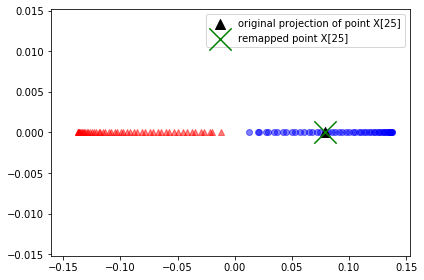

In [62]:
#첫 번째 주성분에 투영된 것을 그래프로 그리기
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

In [63]:
##사이킷 런의 커널 PCA##
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

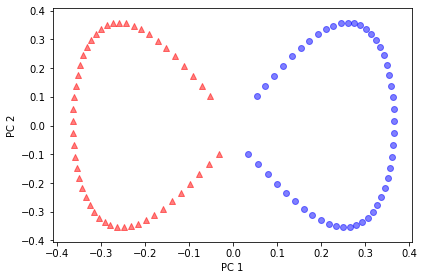

In [64]:
#그래프 그려서 기존에 구현한 커널 PCA와 동일한지 확인하기
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.show() 
##동일하다.